# Proof of concept (POC)

Proof of concept is a realization of a certain method or idea in order to demonstrate its feasibility, or a demonstration in principle with the aim of verifying that some concept or theory has practical potential. A proof of concept is usually small and may or may not be complete. [Source](https://en.wikipedia.org/wiki/Proof_of_concept)

**Machine Learning Project Workflow**

1) Import libraries/Data Loading

2) Data Cleaning/Preprocessing

3) Exploratory Data Analysis

4) Feature Extraction

5) Model Building/Evaluation

Import libraries for data manipulation, visualization, model building, error metrics and others



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load csv file as dataframe. Make a copy for raw reference.

We'll work with "data" dataframe while "data_copy" dataframe will be untouched.

In [0]:
data_copy = pd.read_csv('combined.csv', delimiter = ';')
data = pd.read_csv('combined.csv', delimiter = ';')

Examine both dataframes to ensure that they are loaded correctly

In [0]:
print(data_copy.head())
print(data.head())

           t_stamp P1_STATE  LIT101.Pv  ... LSL602.Alarm LSH603.Alarm LSL603.Alarm
0  26/2/2020 14:40        1   816.9284  ...     Inactive     Inactive       Active
1  26/2/2020 14:40        1   816.7321  ...     Inactive     Inactive       Active
2  26/2/2020 14:40        1   816.9284  ...     Inactive     Inactive       Active
3  26/2/2020 14:40        1  816.88916  ...     Inactive     Inactive       Active
4  26/2/2020 14:40        1   816.8499  ...     Inactive     Inactive       Active

[5 rows x 82 columns]
           t_stamp P1_STATE  LIT101.Pv  ... LSL602.Alarm LSH603.Alarm LSL603.Alarm
0  26/2/2020 14:40        1   816.9284  ...     Inactive     Inactive       Active
1  26/2/2020 14:40        1   816.7321  ...     Inactive     Inactive       Active
2  26/2/2020 14:40        1   816.9284  ...     Inactive     Inactive       Active
3  26/2/2020 14:40        1  816.88916  ...     Inactive     Inactive       Active
4  26/2/2020 14:40        1   816.8499  ...     Inactive     Ina

Check the shape: 8701 rows and 82 columns

In [0]:
data.shape

(8701, 82)

Examine the entire dataframe. We are interested in sensory values from process stage 3, the ultrafiltration stage. From the dataframe, you can see that the values of stage 3 are after the "P3_STATE" column.

In [0]:
data

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,AIT203.Pv,MV201.Status,P201.Status,P202.Status,P203.Status,P204.Status,P205.Status,P206.Status,P207.Status,P208.Status,LS201.Alarm,LS202.Alarm,LSL203.Alarm,LSLL203.Alarm,P3_STATE,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv,MV301.Status,MV302.Status,MV303.Status,MV304.Status,P301.Status,P302.Status,PSH301.Alarm,DPSH301.Alarm,...,FIT401.Pv,AIT401.Pv,AIT402.Pv,P401.Status,P402.Status,P403.Status,P404.Status,UV401.Status,LS401.Alarm,P5_STATE,FIT501.Pv,FIT502.Pv,FIT503.Pv,FIT504.Pv,AIT501.Pv,AIT502.Pv,AIT503.Pv,AIT504.Pv,PIT501.Pv,PIT502.Pv,PIT503.Pv,P501.Status,P502.Status,MV501.Status,MV502.Status,MV503.Status,MV504.Status,PSH501.Alarm,PSL501.Alarm,P6_STATE,FIT601.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,26/2/2020 14:40,1,816.9284,0,1,1,1,1,0.000384455,60.8177376,8.293579,162.599335,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive,1,7.58780956,169.818817,78.6542,1009.87732,0.000640553,2.989948,1,1,1,1,1,1,Inactive,Inactive,...,0.000896344,0,0,1,1,1,1,1,Inactive,1,0.002307101,0.001793263,0.001664373,0,7.45020533,159.548828,96.4816742,4.921815,44.7000771,28.06523,40.2941551,1,1,1,1,1,1,Inactive,Inactive,1,0.000320379,1,1,1,Active,Inactive,Active,Inactive,Inactive,Active
1,26/2/2020 14:40,1,816.7321,0,1,1,1,1,0.000384455,60.8177376,8.29454,162.599335,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive,1,7.58780956,169.895645,78.6542,1009.87732,0.000640553,2.989948,1,1,1,1,1,1,Inactive,Inactive,...,0.000896344,0,0,1,1,1,1,1,Inactive,1,0.002307101,0.001793263,0.001664373,0,7.45020533,159.548828,96.4816742,4.921815,44.7000771,28.06523,40.2941551,1,1,1,1,1,1,Inactive,Inactive,1,0.000320379,1,1,1,Active,Inactive,Active,Inactive,Inactive,Active
2,26/2/2020 14:40,1,816.9284,0,1,1,1,1,0.000384455,60.8177376,8.29454,162.599335,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive,1,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948,1,1,1,1,1,1,Inactive,Inactive,...,0.000896344,0,0,1,1,1,1,1,Inactive,1,0.002307101,0.001793263,0.001664373,0,7.45020533,159.548828,96.4816742,4.921815,44.7000771,28.06523,40.2941551,1,1,1,1,1,1,Inactive,Inactive,1,0.000320379,1,1,1,Active,Inactive,Active,Inactive,Inactive,Active
3,26/2/2020 14:40,1,816.88916,0,1,1,1,1,0.000384455,60.8177376,8.295822,162.599335,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive,1,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948,1,1,1,1,1,1,Inactive,Inactive,...,0.000896344,0,0,1,1,1,1,1,Inactive,1,0.002307101,0.001793263,0.001664373,0,7.45020533,159.548828,96.4816742,4.921815,44.7000771,28.06523,40.2941551,1,1,1,1,1,1,Inactive,Inactive,1,0.000320379,1,1,1,Active,Inactive,Active,Inactive,Inactive,Active
4,26/2/2020 14:40,1,816.8499,0,1,1,1,1,0.000384455,60.8177376,8.298706,162.599335,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive,1,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948,1,1,1,1,1,1,Inactive,Inactive,...,0.000896344,0,0,1,1,1,1,1,Inactive,1,0.002307101,0.001793263,0.001664373,0,7.45020533,159.548828,96.4816742,4.921815,44.7000771,28.06523,40.2941551,1,1,1,1,1,1,Inactive,Inactive,1,0.000320379,1,1,1,Active,Inactive,Active,Inactive,Inactive,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,26/2/2020 17:04,2,804.0142,0,1,1,1,2,0.000256303,74.14765,9.085363,160.907455,1,1,1,1,1,1,1,1,1,Inactive,Inactive,Inactive,Inactive,99,8.06681,187.4896,69.30661,1007.83453,0.000384332,2.82668543,1,1,1,1,1,1,Inactive,Inactive,...,1.35616875,0,0,2,1,1,1,2,Inactive,12,1.36503458,1.224414,0.111641012,0,7.444758,179.979492,70.55883,3.84516788,222.635223

Extract the 6 columns which contain the 6 sensory values of stage 3 and the timestamp column

In [0]:
data_p3 = data.iloc[:, [0, 26, 27, 28, 29, 30, 31]]
data_p3.head()

,t_stamp,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv
0,26/2/2020 14:40,7.58780956,169.818817,78.6542,1009.87732,0.000640553,2.989948
1,26/2/2020 14:40,7.58780956,169.895645,78.6542,1009.87732,0.000640553,2.989948
2,26/2/2020 14:40,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948
3,26/2/2020 14:40,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948
4,26/2/2020 14:40,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948


In [0]:
data_p3.shape

(8701, 7)

**Data Cleaning and Preprocessing**

Check for null values. None found.

In [0]:
data_p3.isna().sum()

t_stamp       0
AIT301.Pv     0
AIT302.Pv     0
AIT303.Pv     0
LIT301.Pv     0
FIT301.Pv     0
DPIT301.Pv    0
dtype: int64

Remove rows with 'Bad Input' value. 66 such rows found. 

In [0]:
data_p3.drop(data_p3.loc[data_p3.apply(lambda row: row.astype(str).str.contains('Bad Input').any(), axis=1)].index, inplace = True)

Ensure successful removal of these erroneous rows. 0 rows found.

In [0]:
data_p3.loc[data_p3.apply(lambda row: row.astype(str).str.contains('Bad Input').any(), axis=1)]

,t_stamp,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv


In [0]:
data_p3.shape

(8635, 7)

In [0]:
data_p3

,t_stamp,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv
0,26/2/2020 14:40,7.58780956,169.818817,78.6542,1009.87732,0.000640553,2.989948
1,26/2/2020 14:40,7.58780956,169.895645,78.6542,1009.87732,0.000640553,2.989948
2,26/2/2020 14:40,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948
3,26/2/2020 14:40,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948
4,26/2/2020 14:40,7.58780956,169.921249,78.6542,1009.87732,0.000640553,2.989948
...,...,...,...,...,...,...,...
8695,26/2/2020 17:04,8.06681,187.4896,69.30661,1007.83453,0.000384332,2.82668543
8696,26/2/2020 17:04,8.06681,187.4896,69.30661,1007.83453,0.000384332,2.82668543
8697,26/2/2020 17:04,8.06681,187.4896,69.30661,1007.83453,0.000384332,2.82668543
8698,26/2/2020 17:04,8.06681,187.4896,69.30661,1007.83453,0.000384332,2.82668543


Ensure correct data types, modify if needed

In [0]:
data_p3.dtypes

t_stamp       object
AIT301.Pv     object
AIT302.Pv     object
AIT303.Pv     object
LIT301.Pv     object
FIT301.Pv     object
DPIT301.Pv    object
dtype: object

Change sensory values to float data type

In [0]:
for col in ['AIT301.Pv', 'AIT302.Pv', 'AIT303.Pv', 'LIT301.Pv', 'FIT301.Pv', 'DPIT301.Pv']:
    data_p3[col] = data_p3[col].astype('float64')

In [0]:
data_p3.dtypes

t_stamp        object
AIT301.Pv     float64
AIT302.Pv     float64
AIT303.Pv     float64
LIT301.Pv     float64
FIT301.Pv     float64
DPIT301.Pv    float64
dtype: object

Reset the index 

In [0]:
data_p3.reset_index(inplace=True)

Statistical summary of the clean sensory values

In [0]:
data_p3.describe()

,index,AIT301.Pv,AIT302.Pv,AIT303.Pv,LIT301.Pv,FIT301.Pv,DPIT301.Pv
count,8635.000000,8635.000000,8635.000000,8635.000000,8635.000000,8635.000000,8635.000000
mean,4367.833816,7.767312,177.665663,79.479338,895.372302,1.714188,20.282930
std,2511.972109,0.196456,8.315743,72.527517,64.981233,0.926120,9.461780
min,0.000000,6.516198,106.306419,46.257760,783.252700,0.000000,0.016006
25%,2223.500000,7.642327,173.660278,56.693767,844.294750,1.857797,18.378258
50%,4382.000000,7.726807,177.168839,65.721240,891.157700,2.181212,19.527498
75%,6540.500000,7.859978,181.932266,71.067280,943.367919,2.277552,20.036493
max,8699.000000,8.435944,201.267685,427.300049,1010.718440,2.630368,45.000000


**Exploratory Data Analysis**

Visualization of Time Series Plots. As this is a proof of concept, we'll be using the dataframe index as the x-axis instead of the exact timeframe. The unit is in seconds. 0 is the reference timing. 2000 means the 2000th second since the start of the experiment.

Although we have removed a few data points due to bad input, they have immaterial impact on the visualization or analysis in general. The nature of most forecasting models requires equal interval for the time period. We would have to make do with the infrequent occurence of a "skip" of 1 or more seconds of the data points. In return, this would facilitate the smooth building of the model.

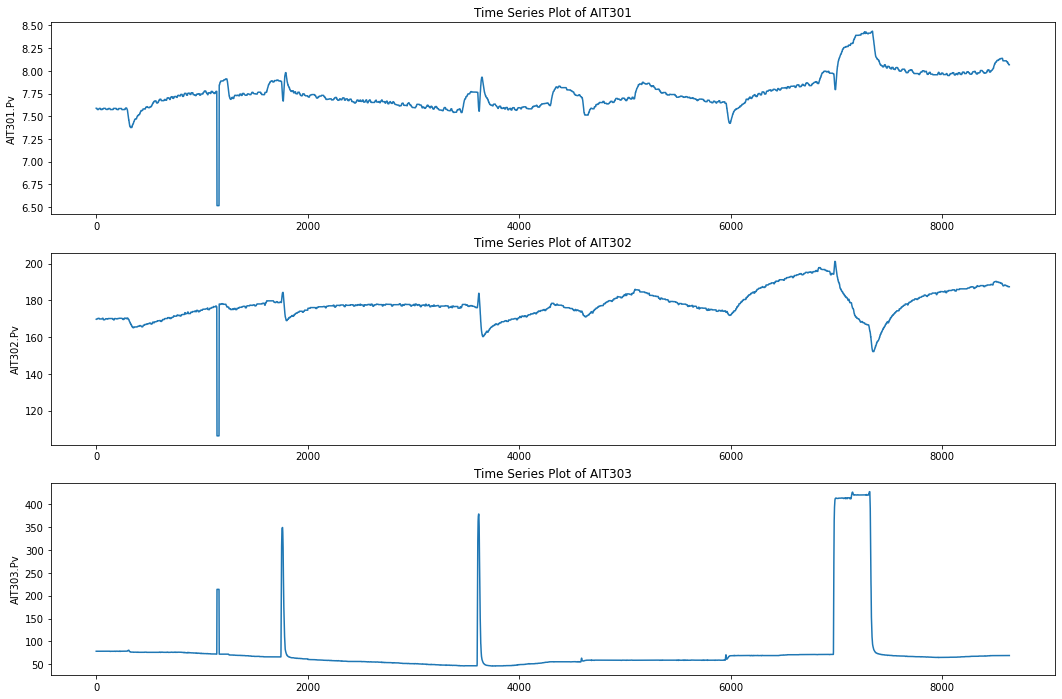

In [0]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(18,12)
axs[0].set_title('Time Series Plot of AIT301')
axs[1].set_title('Time Series Plot of AIT302')
axs[2].set_title('Time Series Plot of AIT303')
sns.lineplot(x = data_p3.index, y = 'AIT301.Pv', data = data_p3, ax = axs[0])
sns.lineplot(x = data_p3.index, y = 'AIT302.Pv', data = data_p3, ax = axs[1])
sns.lineplot(x = data_p3.index, y = 'AIT303.Pv', data = data_p3, ax = axs[2]);

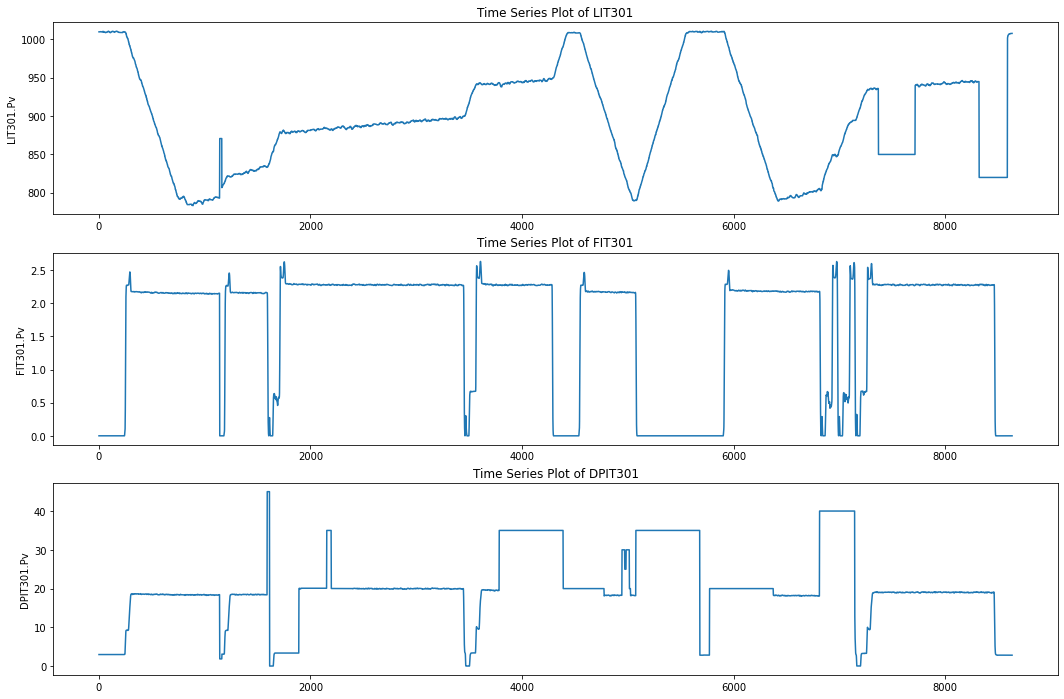

In [0]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(18,12)
axs[0].set_title('Time Series Plot of LIT301')
axs[1].set_title('Time Series Plot of FIT301')
axs[2].set_title('Time Series Plot of DPIT301')
sns.lineplot(x = data_p3.index, y = 'LIT301.Pv', data = data_p3, ax = axs[0])
sns.lineplot(x = data_p3.index, y = 'FIT301.Pv', data = data_p3, ax = axs[1])
sns.lineplot(x = data_p3.index, y = 'DPIT301.Pv', data = data_p3, ax = axs[2]);

**Feature Extraction**

Differential Pressure Indicating Transmitter (DPIT) will be used as the primary feature for the time series model as it represents the key parameter changed during the experiment. It is also a prominent indicator of when the next maintenance timing is required. Lag features will be extracted from this primary feature.

In [0]:
series = data_p3.iloc[:, -1]
data_df = pd.DataFrame(series)
data_df.head()

,DPIT301.Pv
0,2.989948
1,2.989948
2,2.989948
3,2.989948
4,2.989948


Adding the lag of the target variable (DPIT301) from 5 steps back up to 30 steps. 

Note: 1 step = 1 second (s)

In [0]:
for i in range(5, 31):
    data_df["lag_{}".format(i)] = data_df["DPIT301.Pv"].shift(i)

Ensure the features are successfully extracted

In [0]:
data_df.tail()

,DPIT301.Pv,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30
8630,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.813880,2.813880,2.813880,2.813880,2.81388,2.81388,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289
8631,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.813880,2.813880,2.813880,2.81388,2.81388,2.813880,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289
8632,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.813880,2.813880,2.81388,2.81388,2.813880,2.813880,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289
8633,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.813880,2.81388,2.81388,2.813880,2.813880,2.813880,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289
8634,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.826685,2.81388,2.81388,2.813880,2.813880,2.813880,2.813880,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289,2.836289


In [0]:
data_df.dropna(inplace = True)

In [0]:
data_df.reset_index(drop = True, inplace = True)

In [0]:
data_df.head()

,DPIT301.Pv,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30
0,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948
1,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948
2,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948
3,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948
4,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948,2.989948


Use time-series train test splitting to respect the temporal order

In [0]:
tscv = TimeSeriesSplit()

Ready the X and y labels for subsequent model building

In [0]:
X = data_df.iloc[:, 1:]
y = data_df.iloc[:, 0]

**Model Building and Evaluation**

Deploy 3 types of models to test out.

1) Linear Regression (Baseline model)

2) Random Forest Regressor

3) Gradient Boosting Regressor

In [0]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(objective ='reg:squarederror', random_state=0)

Linear Regression

In [0]:
n_to_avg = 5
rmse_tracker = 0
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y[train_index], y[test_index]
     lr.fit(X_train, y_train)
     preds = lr.predict(X_test)
     rmse = round(np.sqrt(mean_squared_error(y_test, preds)), 2)
     rmse_tracker += rmse
     print("RMSE: %f" % (rmse))
print("Average RMSE: ", round((rmse_tracker/n_to_avg), 2))

TRAIN: [   0    1    2 ... 1432 1433 1434] TEST: [1435 1436 1437 ... 2866 2867 2868]
RMSE: 3.460000
TRAIN: [   0    1    2 ... 2866 2867 2868] TEST: [2869 2870 2871 ... 4300 4301 4302]
RMSE: 1.410000
TRAIN: [   0    1    2 ... 4300 4301 4302] TEST: [4303 4304 4305 ... 5734 5735 5736]
RMSE: 2.610000
TRAIN: [   0    1    2 ... 5734 5735 5736] TEST: [5737 5738 5739 ... 7168 7169 7170]
RMSE: 2.450000
TRAIN: [   0    1    2 ... 7168 7169 7170] TEST: [7171 7172 7173 ... 8602 8603 8604]
RMSE: 0.740000
Average RMSE:  2.13


Random Forest Regressor

In [0]:
rmse_tracker = 0
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y[train_index], y[test_index]
     rf.fit(X_train, y_train)
     preds = rf.predict(X_test)
     rmse = round(np.sqrt(mean_squared_error(y_test, preds)), 2)
     rmse_tracker += rmse
     print("RMSE: %f" % (rmse))
print("Average RMSE: ", round((rmse_tracker/n_to_avg), 2))

TRAIN: [   0    1    2 ... 1432 1433 1434] TEST: [1435 1436 1437 ... 2866 2867 2868]
RMSE: 5.070000
TRAIN: [   0    1    2 ... 2866 2867 2868] TEST: [2869 2870 2871 ... 4300 4301 4302]
RMSE: 2.850000
TRAIN: [   0    1    2 ... 4300 4301 4302] TEST: [4303 4304 4305 ... 5734 5735 5736]
RMSE: 3.670000
TRAIN: [   0    1    2 ... 5734 5735 5736] TEST: [5737 5738 5739 ... 7168 7169 7170]
RMSE: 3.380000
TRAIN: [   0    1    2 ... 7168 7169 7170] TEST: [7171 7172 7173 ... 8602 8603 8604]
RMSE: 2.190000
Average RMSE:  3.43


Gradient Boosting Regressor

In [0]:
rmse_tracker = 0
for train_index, test_index in tscv.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y[train_index], y[test_index]
     xgb.fit(X_train, y_train)
     preds = xgb.predict(X_test)
     rmse = round(np.sqrt(mean_squared_error(y_test, preds)), 2)
     rmse_tracker += rmse
     print("RMSE: %f" % (rmse))
print("Average RMSE: ", round((rmse_tracker/n_to_avg), 2))

TRAIN: [   0    1    2 ... 1432 1433 1434] TEST: [1435 1436 1437 ... 2866 2867 2868]
RMSE: 5.060000
TRAIN: [   0    1    2 ... 2866 2867 2868] TEST: [2869 2870 2871 ... 4300 4301 4302]
RMSE: 2.680000
TRAIN: [   0    1    2 ... 4300 4301 4302] TEST: [4303 4304 4305 ... 5734 5735 5736]
RMSE: 3.380000
TRAIN: [   0    1    2 ... 5734 5735 5736] TEST: [5737 5738 5739 ... 7168 7169 7170]
RMSE: 18.290000
TRAIN: [   0    1    2 ... 7168 7169 7170] TEST: [7171 7172 7173 ... 8602 8603 8604]
RMSE: 0.910000
Average RMSE:  6.06
